# Model: SVR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
import warnings
warnings.filterwarnings('ignore' )

In [3]:
df=pd.read_csv('D_data.csv',index_col='Date',parse_dates=True)
df.head(5)

,Wind speed,Generator speed,Blade angle,Wind direction,Ambient temperature,Active power
Date,,,,,,
2020-01-01,5.313541,11.770079,-0.561819,-351.656781,29.223170,259.196071
2020-01-02,5.483615,12.008322,-0.100172,-348.796442,29.447159,280.923954
2020-01-03,5.140796,11.467794,-0.776094,-351.823328,29.560999,231.064502
2020-01-04,4.368247,10.245036,-0.776035,-361.517685,29.573758,147.105333
2020-01-05,5.700915,12.506949,-0.776141,-362.518394,29.512227,296.006479


In [4]:
# then split data to features and target
from sklearn.model_selection import train_test_split
x=df.drop(['Active power'],axis=1)
y=df['Active power'].values.ravel()
y=y.reshape(-1,1)

# Test Train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2)

In [5]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

std_x=StandardScaler()
std_y=StandardScaler()

x2=std_x.fit_transform(x_train)
y2=std_y.fit_transform(y_train)

In [6]:
# Fitting SVR to the Training set
from sklearn.svm import SVR
model_SVR = SVR(kernel = 'rbf')
model_SVR.fit(x2, y2)

SVR()

In [7]:
y_pred_SVR = model_SVR.predict(std_x.fit_transform(x_test))
y_pred_SVR =y_pred_SVR.reshape(-1,1)
y_pred_SVR = std_y.inverse_transform(y_pred_SVR)

In [8]:
y_test = y_test.flatten()
y_pred_SVR = y_pred_SVR.flatten()

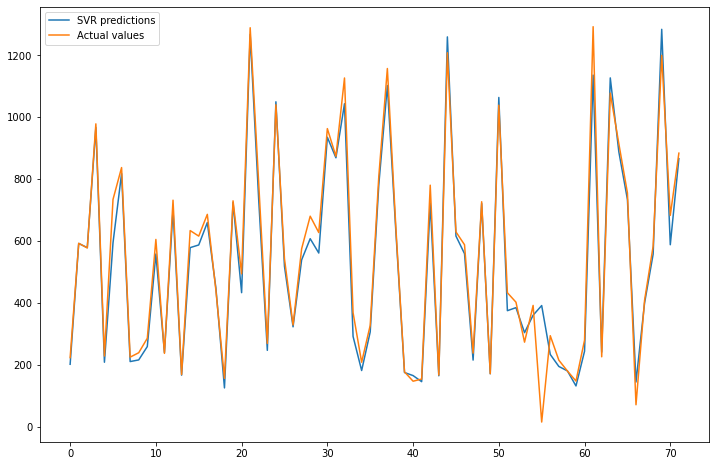

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(y_pred_SVR,label='SVR predictions')
plt.plot(y_test,label='Actual values')
plt.legend(loc='upper left')
plt.show()

In [10]:
data = pd.DataFrame({'Predicted value': y_pred_SVR, 'Real Value': y_test})
data.head(20)

,Predicted value,Real Value
0,201.791655,223.326349
1,592.125790,592.697148
2,578.620859,577.682788
3,966.877841,978.516872
4,208.400203,228.530926
5,594.192979,734.417792
6,817.805504,837.286927
7,210.603343,224.888789
8,215.905572,239.111992
9,259.062339,285.855145


In [11]:
df['Active power'].mean()

524.3989780813204

In [12]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error, mean_squared_error

print('R2-score:',r2_score(y_test,y_pred_SVR))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_SVR)))
print('MAE:',mean_absolute_error(y_test, y_pred_SVR))
print('MSE:',mean_squared_error(y_test, y_pred_SVR))

R2-score: 0.9649788944982726
RMSE: 62.50880200909079
MAE: 37.215342468841214
MSE: 3907.350328611713


In [13]:
#data.to_csv('SVR_dataset.csv', sep=';')